## DATA-6550 Data Bias Project

This notebook is a continuation on the notebook "preprocessed_work.ipynb" by Stiven LaVrenov

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

---

### Data Load:

In [2]:
df = pd.read_csv('../../Data/diabetes_data.csv')

In [3]:
df.head(2)

,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_catg
0,2278392,8222157,Caucasian,Female,u,u,r,1,41,0,...,No,No,No,No,No,No,No,No,NO,1.0
1,149190,55629189,Caucasian,Female,k,d,o,3,59,0,...,Up,No,No,No,No,No,Ch,Yes,>30,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100111 entries, 0 to 100110
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              100111 non-null  int64  
 1   patient_nbr               100111 non-null  int64  
 2   race                      100111 non-null  object 
 3   gender                    100111 non-null  object 
 4   admission_type_id         100111 non-null  object 
 5   discharge_disposition_id  100111 non-null  object 
 6   admission_source_id       100111 non-null  object 
 7   time_in_hospital          100111 non-null  int64  
 8   num_lab_procedures        100111 non-null  int64  
 9   num_procedures            100111 non-null  int64  
 10  num_medications           100111 non-null  int64  
 11  number_outpatient         100111 non-null  int64  
 12  number_emergency          100111 non-null  int64  
 13  number_inpatient          100111 non-null  i

---

## Data Exploration and Visualizations:

### Exploration Code 1 

Text(0.5, 1.0, 'Overall Gender Makeup')

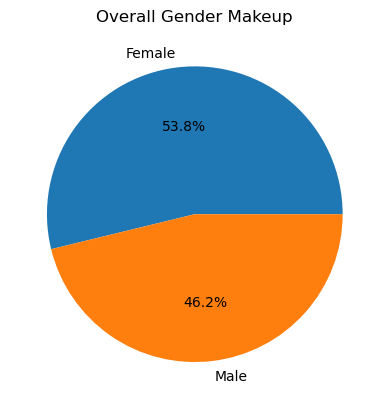

In [5]:
df_gender = df['gender'].value_counts().reset_index()
plt.pie(df_gender['count'], labels=df_gender['gender'], autopct='%1.1f%%')
plt.title('Overall Gender Makeup')

Text(0.5, 1.0, 'Overall Racial Makeup')

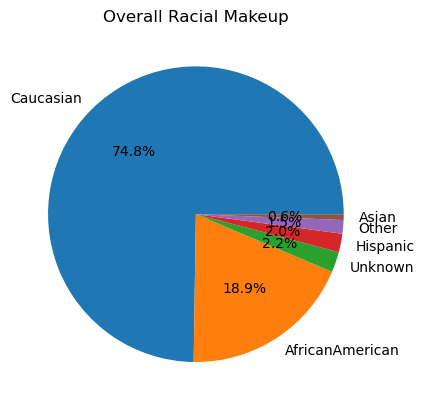

In [6]:
df_race = df['race'].value_counts().reset_index()
plt.pie(df_race['count'], labels=df_race['race'], autopct='%1.1f%%')
plt.title('Overall Racial Makeup')

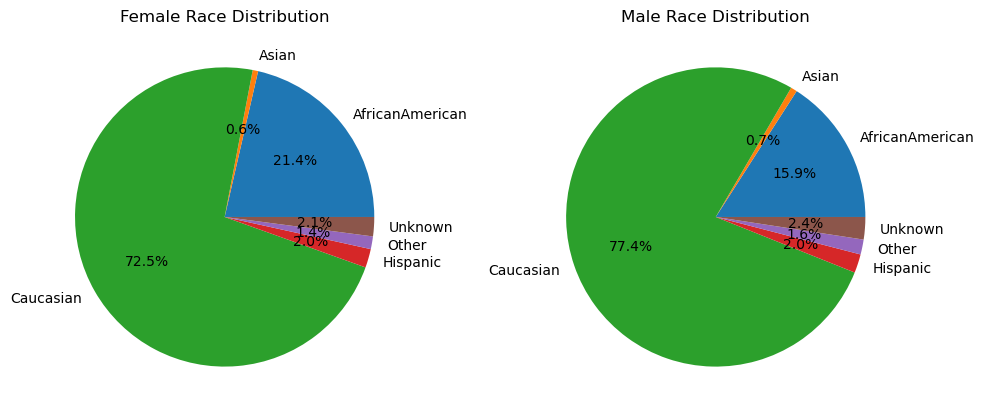

In [7]:
df_gender_race = df.groupby(['gender','race'], as_index=False)['encounter_id'].count()
df_gender_race_f = df_gender_race[df_gender_race['gender']=='Female']
df_gender_race_m = df_gender_race[df_gender_race['gender']=='Male']

fig, axs = plt.subplots(1,2, figsize=(10,10))
axs[0].pie(df_gender_race_f['encounter_id'], labels=df_gender_race_f['race'], autopct='%1.1f%%')
axs[0].set_title('Female Race Distribution')
axs[1].pie(df_gender_race_m['encounter_id'], labels=df_gender_race_m['race'], autopct='%1.1f%%')
axs[1].set_title('Male Race Distribution')
plt.tight_layout()

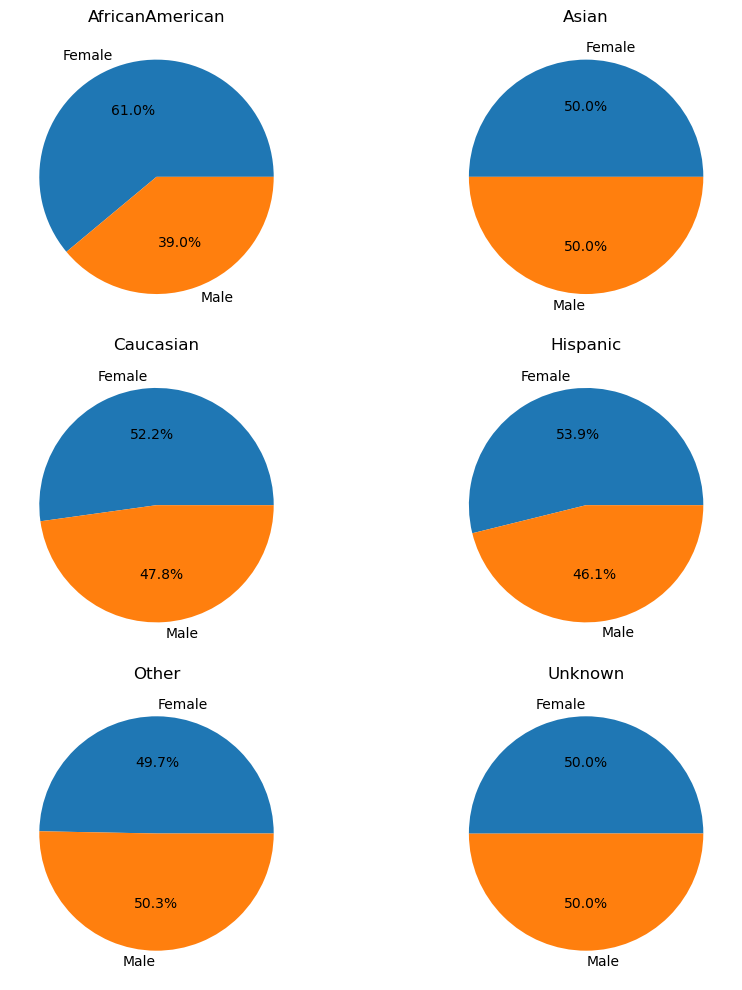

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(10,10))

for i, racialgroup in enumerate(df_gender_race['race'].unique()):
    row = i//2
    col = i%2
    tmp_df = df_gender_race[df_gender_race['race']==racialgroup]
    axs[row, col].pie(tmp_df['encounter_id'], labels=tmp_df['gender'], autopct='%1.1f%%')
    axs[row, col].set_title(racialgroup)
plt.tight_layout()

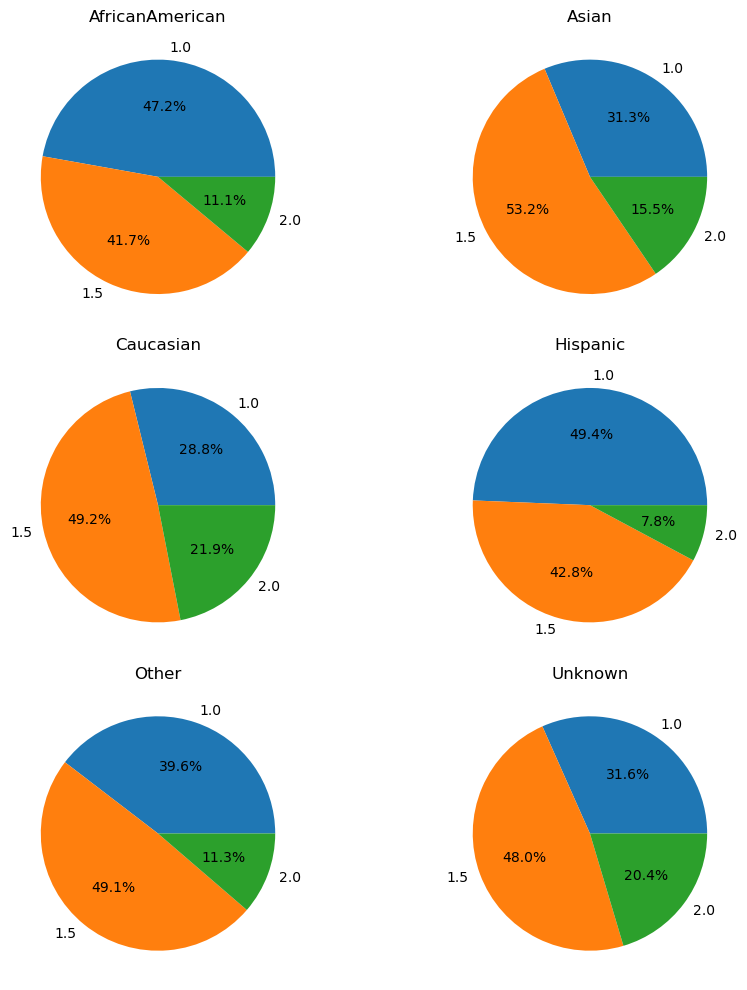

In [9]:
df_age_race = df.groupby(['age_catg','race'], as_index=False)['encounter_id'].count()

fig, axs = plt.subplots(3, 2, figsize=(10,10))

for i, racialgroup in enumerate(df_age_race['race'].unique()):
    row = i//2
    col = i%2
    tmp_df = df_age_race[df_age_race['race']==racialgroup]
    axs[row, col].pie(tmp_df['encounter_id'], labels=tmp_df['age_catg'], autopct='%1.1f%%')
    axs[row, col].set_title(racialgroup)
plt.tight_layout()

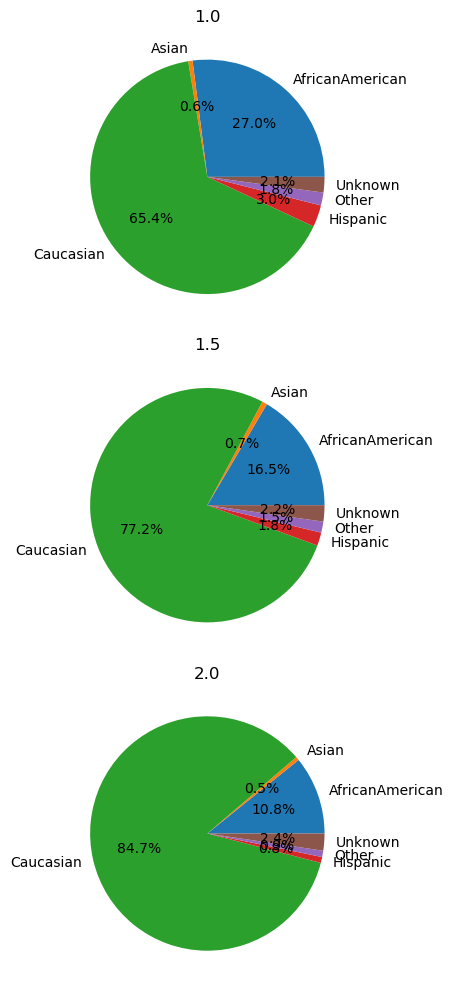

In [10]:
fig, axs = plt.subplots(3, figsize=(10,10))

for i, agegroup in enumerate(df_age_race['age_catg'].unique()):
    tmp_df = df_age_race[df_age_race['age_catg']==agegroup]
    axs[i].pie(tmp_df['encounter_id'], labels=tmp_df['race'], autopct='%1.1f%%')
    axs[i].set_title(agegroup)
plt.tight_layout()

In [11]:
df_gender_race['race'].unique()

array(['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other',
       'Unknown'], dtype=object)

<Axes: xlabel='time_in_hospital', ylabel='Count'>

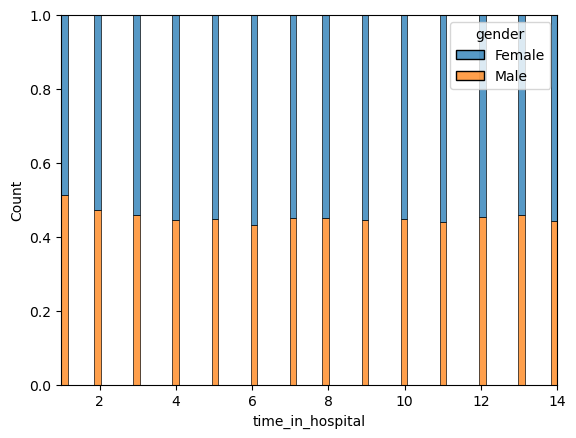

In [12]:
sns.histplot(df, x='time_in_hospital', hue='gender', multiple='fill')

<Axes: xlabel='time_in_hospital', ylabel='Count'>

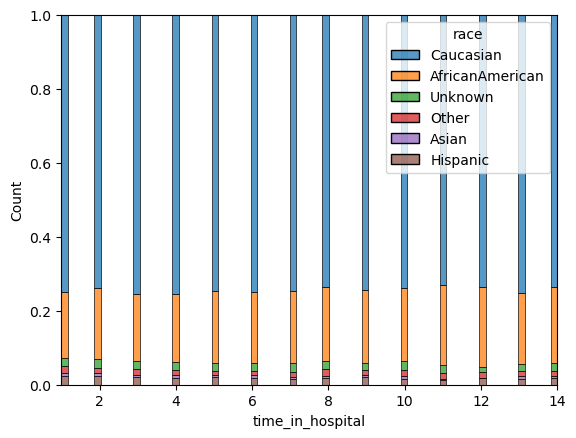

In [13]:
sns.histplot(df, x='time_in_hospital', hue='race', multiple='fill')

<Axes: xlabel='readmitted', ylabel='Count'>

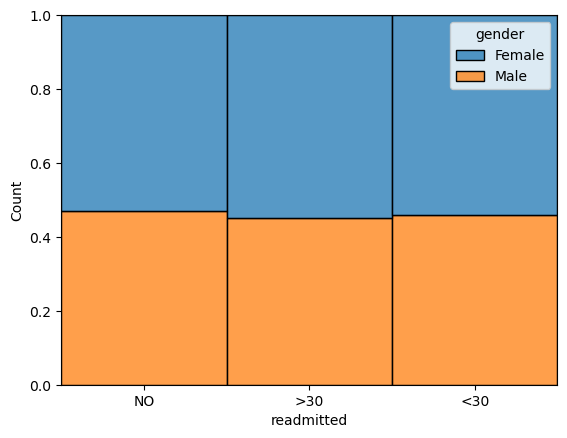

In [14]:
sns.histplot(df, x='readmitted', hue='gender', multiple='fill')

<Axes: xlabel='readmitted', ylabel='Count'>

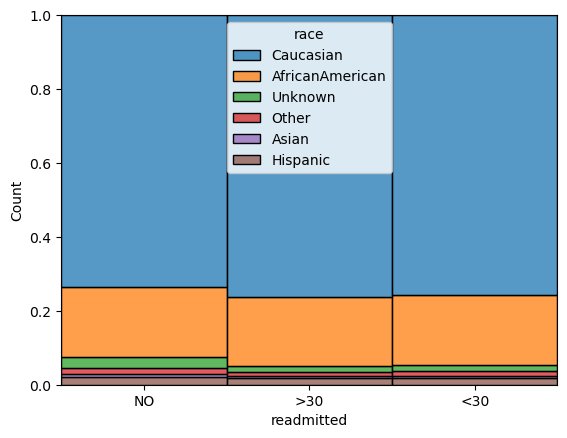

In [15]:
sns.histplot(df, x='readmitted', hue='race', multiple='fill')

<Axes: xlabel='num_procedures', ylabel='Count'>

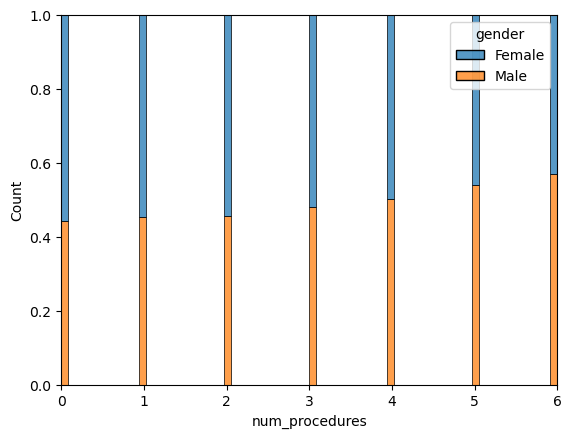

In [16]:
sns.histplot(df, x='num_procedures', hue='gender', multiple='fill')

<Axes: xlabel='num_procedures', ylabel='Count'>

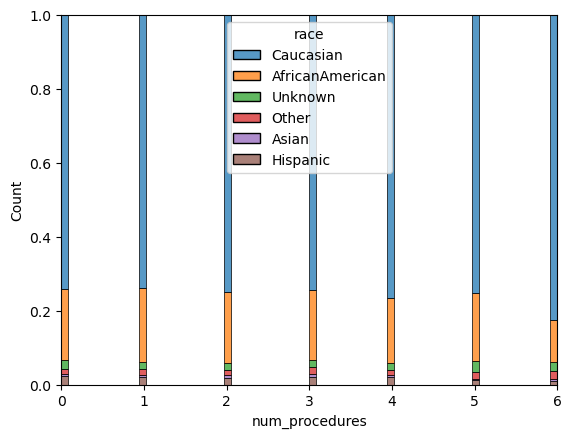

In [17]:
sns.histplot(df, x='num_procedures', hue='race', multiple='fill')

In [18]:
# Exploration Code II

In [19]:
# Visualization Code

---

### Data Preprocessing:

In [20]:
# Features missing more than 80% of values, unreasonable to impute so will drop instead
df = df.drop(['max_glu_serum', 'A1Cresult'], axis = 1).copy()

In [21]:
# Encode `NO` as 0 for no readmittance and `<30` & `>30` as 1 for readmittance in less than 30 days and in more than 30 days, respectively
df['readmitted'] = df['readmitted'] != 'NO'

In [22]:
# Get feature list of medications
list_meds = df.columns[18:39]

In [23]:
# Get medications that aren't mostly `No`, less than ~85%
for med in list_meds:
    if df[med].value_counts().iloc[0] < 85000:
        print(f'***** {med} *****', '\n')
        print(df[med].value_counts(), '\n')

***** metformin ***** 

metformin
No        80214
Steady    18255
Up         1067
Down        575
Name: count, dtype: int64 

***** insulin ***** 

insulin
No        46677
Steady    30331
Down      12012
Up        11091
Name: count, dtype: int64 



In [24]:
# [race]
race_dummies = pd.get_dummies(df['race'], drop_first = False, prefix = 'race', dtype = 'int64')
df = pd.concat([df, race_dummies], axis = 1)

# [gender]
df['gender'] = df['gender'] == 'Male'

# [admission_type_id]
df['admission_type_id'] = df['admission_type_id'] == 'u'

# [discharge_disposition_id]
discharge_dummies = pd.get_dummies(df['discharge_disposition_id'], drop_first = False, prefix = 'dcd', dtype = 'int64')
df = pd.concat([df, discharge_dummies], axis = 1)

# [admission_source_id]
admission_dummies = pd.get_dummies(df['admission_source_id'], drop_first = False, prefix = 'ads', dtype = 'int64')
df = pd.concat([df, admission_dummies], axis = 1)

# [diag_1]
diag1_dummies = pd.get_dummies(df['diag_1'], drop_first = False, prefix = 'd1', dtype = 'int64')
df = pd.concat([df, diag1_dummies], axis = 1)

# [diag_2]
diag2_dummies = pd.get_dummies(df['diag_2'], drop_first = False, prefix = 'd2', dtype = 'int64')
df = pd.concat([df, diag2_dummies], axis = 1)

# [change]
df['change'] = df['change'] == 'Ch'

# [diabetesMed]
df['diabetesMed'] = df['diabetesMed'] == 'Yes'

# [metformin]
metformin_dummies = pd.get_dummies(df['metformin'], drop_first = False, prefix = 'met', dtype = 'int64')
df = pd.concat([df, metformin_dummies], axis = 1)

# [insulin]
insulin_dummies = pd.get_dummies(df['insulin'], drop_first = False, prefix = 'ins', dtype = 'int64')
df = pd.concat([df, insulin_dummies], axis = 1)

df = df.drop(['race', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'metformin', 'insulin'], axis = 1)

remove_objects = list(df.dtypes[df.dtypes == 'object'].index)
df = df.drop(remove_objects, axis = 1)

In [25]:
X = df.drop('readmitted', axis = 1)
y = df['readmitted']

In [26]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

---

### Data Analysis:

In [27]:
# Data Analysis I
# Cells can be added and removed in this section, does NOT need these 3 specific cells

In [28]:
# Data Analysis II

In [29]:
# Data Analysis III

---